In [ ]:
!pip install py_vollib matplotlib scipy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.3 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62831 sha256=7ad61816cea13cb32c640e09a27a925b5b9b7c3a6c0d0ffd084c606aae5511bd
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24451 sha256=941af8f1143290455b0321346d3673d0b8b92d0d350c7470ecf0ed2e179a0814
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


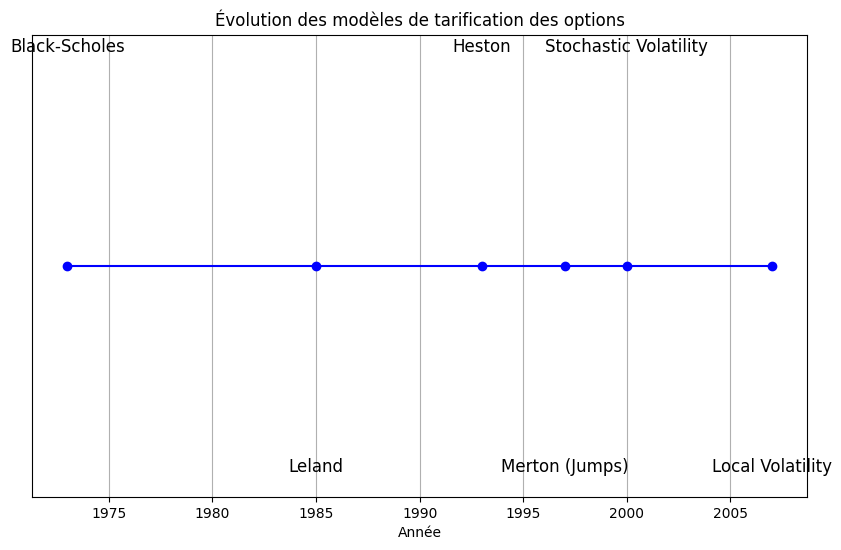

In [ ]:
'''
Partie 0.2 Evolution historique des modèles de tarification
Figure 1: Evolution historique des modèles de tarification des options.
'''

import matplotlib.pyplot as plt

# Données pour la timeline avec décalage vertical pour éviter le chevauchement
events = [
    ("1973", "Black-Scholes", 1.05),
    ("1985", "Leland", 0.95),
    ("1993", "Heston", 1.05),
    ("1997", "Merton (Jumps)", 0.95),
    ("2000", "Stochastic Volatility", 1.05),
    ("2007", "Local Volatility", 0.95)
]

years = [int(event[0]) for event in events]
labels = [event[1] for event in events]
heights = [event[2] for event in events]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(years, [1] * len(years), "o-", color="blue")

for year, label, height in zip(years, labels, heights):
    plt.text(year, height, label, ha='center', va='bottom', fontsize=12)

plt.yticks([])
plt.xlabel("Année")
plt.title("Évolution des modèles de tarification des options")
plt.grid(True)
plt.savefig("timeline_options_pricing.png")
plt.show()



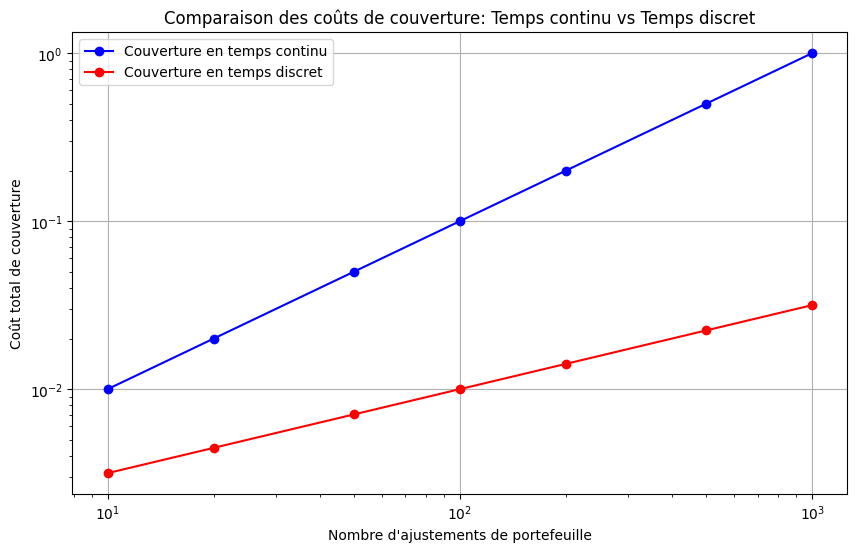

In [ ]:
'''
1 Etat de l’art de la tarification par arbitrage avec coûts de transaction
1.5 Comparaison des stratégies de couverture : Temps continu vs Temps discret
Figure 2: Comparaison des coûts de couverture entre une stratégie en temps continu et une stratégie en temps discret en fonction de
la fréquence des ajustements de portefeuille.
'''

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n_steps = np.array([10, 20, 50, 100, 200, 500, 1000])  # Fréquence des ajustements
cost_per_trade = 0.001  # Coût par transaction

# Stratégies
continuous_costs = cost_per_trade * n_steps  # Coût en temps continu (proportionnel à la fréquence des ajustements)
discrete_costs = cost_per_trade * np.sqrt(n_steps)  # Coût en temps discret (racine carrée de la fréquence des ajustements)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(n_steps, continuous_costs, 'o-', label="Couverture en temps continu", color="blue")
plt.plot(n_steps, discrete_costs, 'o-', label="Couverture en temps discret", color="red")
plt.xlabel("Nombre d'ajustements de portefeuille")
plt.ylabel("Coût total de couverture")
plt.title("Comparaison des coûts de couverture: Temps continu vs Temps discret")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.savefig("cost_comparison_continuous_discrete.png")
plt.show()


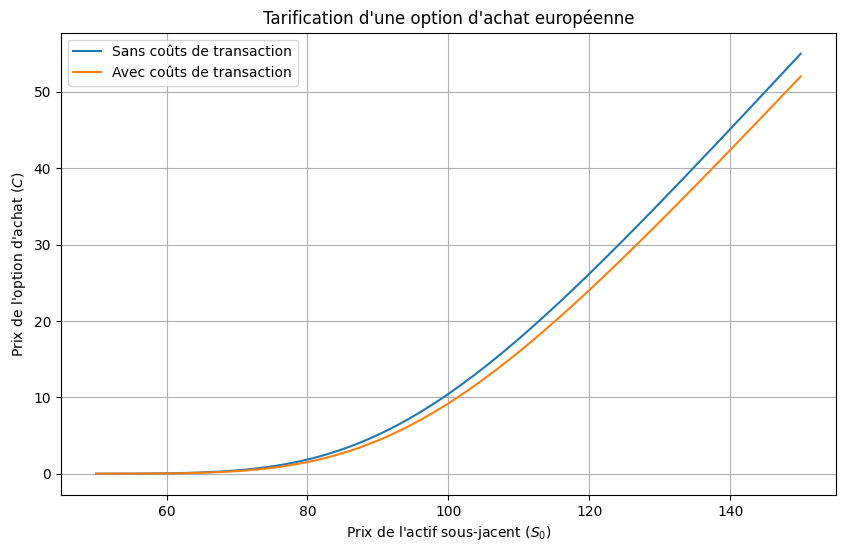

In [2]:
'''
3 Expressions explicites des prix des actifs contingents
3.1 Cas simples
Figure 3: Exemple de tarification d’une option d’achat européenne avec et sans coûts de transaction.
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

S = np.linspace(50, 150, 400)
K = 100
T = 1
r = 0.05
sigma = 0.2
costs = 0.02

call_prices_no_costs = black_scholes_call(S, K, T, r, sigma)
call_prices_with_costs = black_scholes_call(S * (1 - costs), K, T, r, sigma)

plt.figure(figsize=(10, 6))
plt.plot(S, call_prices_no_costs, label='Sans coûts de transaction')
plt.plot(S, call_prices_with_costs, label='Avec coûts de transaction')
plt.xlabel('Prix de l\'actif sous-jacent ($S_0$)')
plt.ylabel('Prix de l\'option d\'achat ($C$)')
plt.title('Tarification d\'une option d\'achat européenne')
plt.legend()
plt.grid(True)
plt.savefig('pricing_example.png')
plt.show()


In [ ]:
'''
3 Expressions explicites des prix des actifs contingents
3.4 Résultats numériques
Table 1: Impact des coûts de transaction et de l’intervalle de révision sur le prix des options selon le modèle de Leland.
'''

import numpy as np
from scipy.stats import norm

# Fonction pour calculer la volatilité ajustée selon le modèle de Leland
def adjusted_volatility(sigma, lambda_cost, delta_t):
    return sigma * np.sqrt(1 + np.sqrt(2/np.pi) * lambda_cost / (sigma * np.sqrt(delta_t)))

# Fonction pour calculer le prix d'une option selon la formule de Black-Scholes
def black_scholes_price(S0, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return price

# Paramètres de l'option
S0 = 100  # Prix initial de l'actif sous-jacent
K = 105  # Prix d'exercice
T = 1.0  # Temps jusqu'à l'expiration (en années)
r = 0.05  # Taux d'intérêt sans risque
sigma = 0.2  # Volatilité historique
lambda_costs = [0.0, 0.005, 0.01, 0.015, 0.02]  # Coûts de transaction
delta_ts = [1, 5, 10, 20, 30]  # Intervalles de révision (en jours)

# Calcul des prix des options avec et sans ajustement de volatilité
results = []
for lambda_cost in lambda_costs:
    for delta_t in delta_ts:
        sigma_L = adjusted_volatility(sigma, lambda_cost, delta_t)
        price_no_adjust = black_scholes_price(S0, K, T, r, sigma, "call")
        price_with_adjust = black_scholes_price(S0, K, T, r, sigma_L, "call")
        results.append((lambda_cost, delta_t, price_no_adjust, price_with_adjust))

# Affichage des résultats
for res in results:
    lambda_cost, delta_t, price_no_adjust, price_with_adjust = res
    print(f"Coût de transaction: {lambda_cost*100:.1f}%, Intervalle de révision: {delta_t} jours, "
          f"Prix sans ajustement: {price_no_adjust:.2f}, Prix avec ajustement: {price_with_adjust:.2f}")


Coût de transaction: 0.0%, Intervalle de révision: 1 jours, Prix sans ajustement: 8.02, Prix avec ajustement: 8.02
Coût de transaction: 0.0%, Intervalle de révision: 5 jours, Prix sans ajustement: 8.02, Prix avec ajustement: 8.02
Coût de transaction: 0.0%, Intervalle de révision: 10 jours, Prix sans ajustement: 8.02, Prix avec ajustement: 8.02
Coût de transaction: 0.0%, Intervalle de révision: 20 jours, Prix sans ajustement: 8.02, Prix avec ajustement: 8.02
Coût de transaction: 0.0%, Intervalle de révision: 30 jours, Prix sans ajustement: 8.02, Prix avec ajustement: 8.02
Coût de transaction: 0.5%, Intervalle de révision: 1 jours, Prix sans ajustement: 8.02, Prix avec ajustement: 8.10
Coût de transaction: 0.5%, Intervalle de révision: 5 jours, Prix sans ajustement: 8.02, Prix avec ajustement: 8.06
Coût de transaction: 0.5%, Intervalle de révision: 10 jours, Prix sans ajustement: 8.02, Prix avec ajustement: 8.05
Coût de transaction: 0.5%, Intervalle de révision: 20 jours, Prix sans ajust

Prix estimé de l'option d'achat : 10.61


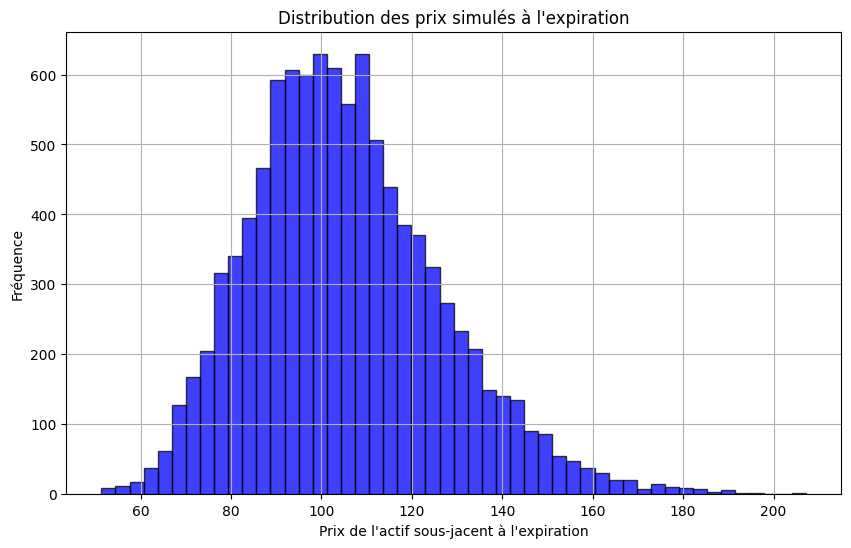

In [ ]:
'''
4 Tarification numérique des options d’achat et de vente en temps continu
4.1 Méthodologie
Figure 4: Simulation de Monte Carlo pour la tarification d’une option d’achat européenne.
'''

import numpy as np
import matplotlib.pyplot as plt

# Paramètres de l'option
S0 = 100      # Prix initial
K = 100       # Prix d'exercice
T = 1.0       # Temps jusqu'à l'expiration
r = 0.05      # Taux sans risque
sigma = 0.2   # Volatilité
N = 10000     # Nombre de trajectoires simulées
M = 252       # Nombre d'étapes par année (simulation journalière)

# Simulation des trajectoires
dt = T / M
S = np.zeros((N, M+1))
S[:, 0] = S0
for t in range(1, M+1):
    z = np.random.standard_normal(N)
    S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Calcul du pay-off de l'option à l'expiration
payoff = np.maximum(S[:, -1] - K, 0)

# Estimation du prix de l'option
price = np.exp(-r * T) * np.mean(payoff)
print(f"Prix estimé de l'option d'achat : {price:.2f}")

# Génération du graphique
plt.figure(figsize=(10, 6))
plt.hist(S[:, -1], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution des prix simulés à l\'expiration')
plt.xlabel('Prix de l\'actif sous-jacent à l\'expiration')
plt.ylabel('Fréquence')
plt.grid(True)
plt.savefig('monte_carlo_simulation.png')
plt.show()


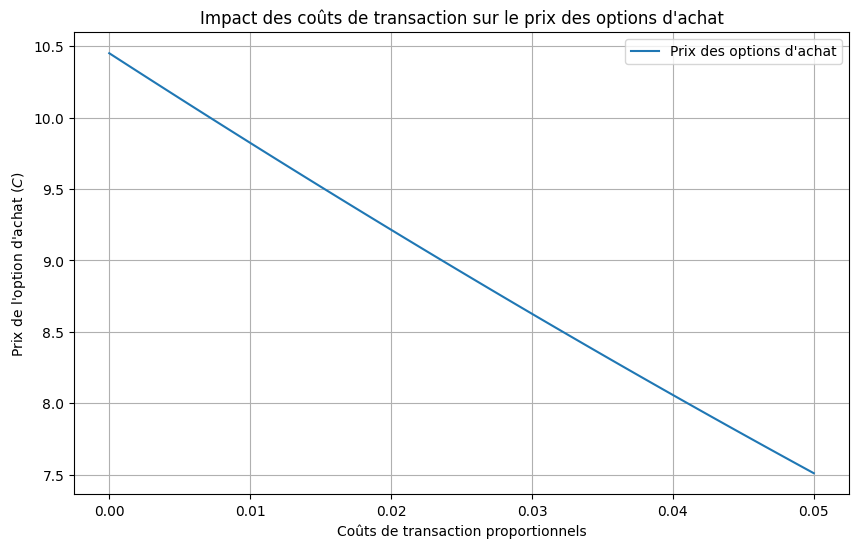

In [ ]:
'''
4 Tarification numérique des options d’achat et de vente en temps continu
4.2 Résultats numériques
Figure 5: Impact des coûts de transaction sur le prix des options d’achat et de vente.
'''

S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2
costs_range = np.linspace(0, 0.05, 100)

call_prices_with_costs = [black_scholes_call(S0 * (1 - c), K, T, r, sigma) for c in costs_range]

plt.figure(figsize=(10, 6))
plt.plot(costs_range, call_prices_with_costs, label='Prix des options d\'achat')
plt.xlabel('Coûts de transaction proportionnels')
plt.ylabel('Prix de l\'option d\'achat ($C$)')
plt.title('Impact des coûts de transaction sur le prix des options d\'achat')
plt.legend()
plt.grid(True)
plt.savefig('simulation_results.png')
plt.show()


[*********************100%***********************]  1 of 1 completed


Prix estimé de l'option d'achat sans coûts de transaction : 15.45
Prix estimé de l'option d'achat avec coûts de transaction : 19.73
Prix estimé de l'option de vente sans coûts de transaction : 15.14
Prix estimé de l'option de vente avec coûts de transaction : 19.39


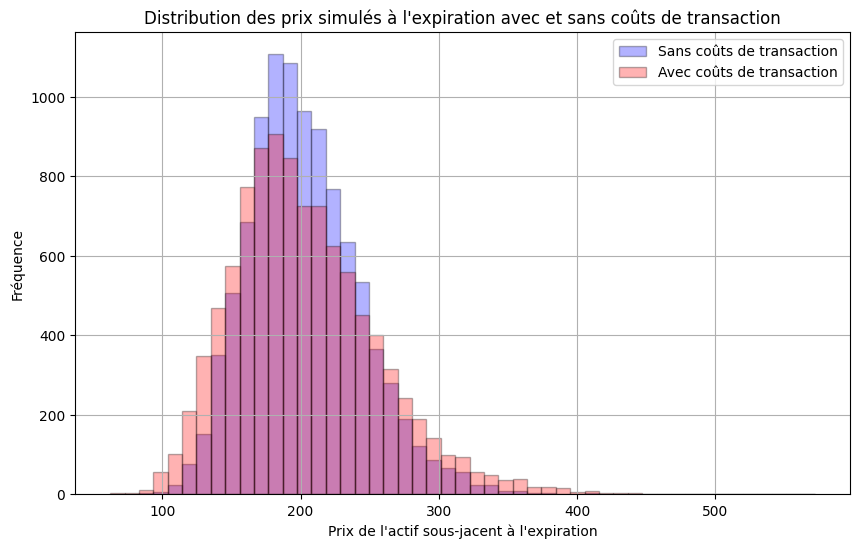

In [ ]:
'''
4 Tarification numérique des options d’achat et de vente en temps continu
4.3 Etude de cas : Impact des coûts de transaction sur la tarification des options
Figure 6: Distribution des prix simulés à l’expiration avec et sans coûts de transaction.
'''

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Téléchargement des données historiques de l'actif sous-jacent (par exemple, AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2024-01-01', interval='1d')

# Extraction des prix de clôture
prices = data['Close'].values

# Calibrage des paramètres
S0 = prices[-1]  # Prix actuel de l'actif sous-jacent
K = S0 * 1.05    # Prix d'exercice (par exemple, 5% au-dessus du prix actuel)
T = 1.0          # 1 an jusqu'à l'expiration
r = 0.05         # Taux sans risque (constante)
sigma = np.std(np.diff(np.log(prices))) * np.sqrt(252)  # Volatilité historique annualisée
N = 10000        # Nombre de trajectoires simulées
M = 252          # Nombre d'étapes par année (simulation journalière)
lambda_cost = 0.01  # Coût de transaction proportionnel (1%)

# Simulation des trajectoires avec et sans coûts de transaction
dt = T / M
S_no_cost = np.zeros((N, M+1))
S_cost = np.zeros((N, M+1))
S_no_cost[:, 0] = S_cost[:, 0] = S0

for t in range(1, M+1):
    z = np.random.standard_normal(N)
    S_no_cost[:, t] = S_no_cost[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    sigma_adjusted = sigma * np.sqrt(1 + np.sqrt(2/np.pi) * lambda_cost / (sigma * np.sqrt(dt)))
    S_cost[:, t] = S_cost[:, t-1] * np.exp((r - 0.5 * sigma_adjusted**2) * dt + sigma_adjusted * np.sqrt(dt) * z)

# Calcul des pay-offs à l'expiration
payoff_call_no_cost = np.maximum(S_no_cost[:, -1] - K, 0)
payoff_put_no_cost = np.maximum(K - S_no_cost[:, -1], 0)
payoff_call_cost = np.maximum(S_cost[:, -1] - K, 0)
payoff_put_cost = np.maximum(K - S_cost[:, -1], 0)

# Estimation des prix des options
price_call_no_cost = np.exp(-r * T) * np.mean(payoff_call_no_cost)
price_put_no_cost = np.exp(-r * T) * np.mean(payoff_put_no_cost)
price_call_cost = np.exp(-r * T) * np.mean(payoff_call_cost)
price_put_cost = np.exp(-r * T) * np.mean(payoff_put_cost)

print(f"Prix estimé de l'option d'achat sans coûts de transaction : {price_call_no_cost:.2f}")
print(f"Prix estimé de l'option d'achat avec coûts de transaction : {price_call_cost:.2f}")
print(f"Prix estimé de l'option de vente sans coûts de transaction : {price_put_no_cost:.2f}")
print(f"Prix estimé de l'option de vente avec coûts de transaction : {price_put_cost:.2f}")

plt.figure(figsize=(10, 6))
bins = np.linspace(min(S_no_cost[:, -1].min(), S_cost[:, -1].min()),
                   max(S_no_cost[:, -1].max(), S_cost[:, -1].max()), 50)
plt.hist(S_no_cost[:, -1], bins=bins, alpha=0.3, label='Sans coûts de transaction', color='blue', edgecolor='black')
plt.hist(S_cost[:, -1], bins=bins, alpha=0.3, label='Avec coûts de transaction', color='red', edgecolor='black')
plt.title('Distribution des prix simulés à l\'expiration avec et sans coûts de transaction')
plt.xlabel('Prix de l\'actif sous-jacent à l\'expiration')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.savefig('impact_transaction_costs.png')
plt.show()



In [1]:
'''
4 Tarification numérique des options d’achat et de vente en temps continu
4.4 Sensibilité par rapport à la volatilité
4.5 Sensibilité par rapport aux coûts de transaction
'''

import numpy as np
import yfinance as yf

# Fonction pour calculer les prix des options avec et sans coûts de transaction
def option_pricing(S0, K, T, r, sigma, N, M, lambda_cost, delta_t):
    dt = T / M
    S_no_cost = np.zeros((N, M+1))
    S_cost = np.zeros((N, M+1))
    S_no_cost[:, 0] = S_cost[:, 0] = S0

    for t in range(1, M+1):
        z = np.random.standard_normal(N)
        S_no_cost[:, t] = S_no_cost[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
        sigma_adjusted = sigma * np.sqrt(1 + np.sqrt(2/np.pi) * lambda_cost / (sigma * np.sqrt(delta_t)))
        S_cost[:, t] = S_cost[:, t-1] * np.exp((r - 0.5 * sigma_adjusted**2) * dt + sigma_adjusted * np.sqrt(dt) * z)

    payoff_call_no_cost = np.maximum(S_no_cost[:, -1] - K, 0)
    payoff_put_no_cost = np.maximum(K - S_no_cost[:, -1], 0)
    payoff_call_cost = np.maximum(S_cost[:, -1] - K, 0)
    payoff_put_cost = np.maximum(K - S_cost[:, -1], 0)

    price_call_no_cost = np.exp(-r * T) * np.mean(payoff_call_no_cost)
    price_put_no_cost = np.exp(-r * T) * np.mean(payoff_put_no_cost)
    price_call_cost = np.exp(-r * T) * np.mean(payoff_call_cost)
    price_put_cost = np.exp(-r * T) * np.mean(payoff_put_cost)

    return price_call_no_cost, price_call_cost, price_put_no_cost, price_put_cost

# Téléchargement des données historiques de l'actif sous-jacent (par exemple, AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2024-01-01', interval='1d')
prices = data['Close'].values
S0 = prices[-1]
K = S0 * 1.05
T = 1.0
r = 0.05
N = 100000
M = 252

# Sensibilité à la volatilité
volatility_values = [0.1, 0.2, 0.3, 0.4, 0.5]
volatility_results = []

for sigma in volatility_values:
    results = option_pricing(S0, K, T, r, sigma, N, M, 0.01, 20)
    volatility_results.append(results)

# Sensibilité aux coûts de transaction
cost_values = [0.0, 0.005, 0.01, 0.015, 0.02]
cost_results = []

for lambda_cost in cost_values:
    results = option_pricing(S0, K, T, r, 0.2, N, M, lambda_cost, 1)
    cost_results.append(results)



# Affichage des résultats
print("Sensibilité à la volatilité :")
print(volatility_results)
print("\nSensibilité aux coûts de transaction :")
print(cost_results)




[*********************100%***********************]  1 of 1 completed


Sensibilité à la volatilité :
[(7.780670958263317, 7.848674184694276, 7.603207602405854, 7.671665768680634), (15.306799238457328, 15.37410779802712, 15.25702626045029, 15.325235320938715), (23.100291004029994, 23.16812829008288, 22.763753053144963, 22.831278159812626), (30.643576625220092, 30.71066902158158, 30.39483460335545, 30.461911643482065), (38.12534994427565, 38.1918629618415, 37.863646681018416, 37.930136249970474)]

Sensibilité aux coûts de transaction :
[(15.422857999338222, 15.422857999338222, 15.230490051240109, 15.230490051240109), (15.535302653256592, 15.688013516457405, 15.15244333100047, 15.303451676608264), (15.486480894430583, 15.789208080474209, 15.166011534630236, 15.466904031250351), (15.387448221416708, 15.835938341588701, 15.26558737212091, 15.717564114556822), (15.549366478707551, 16.15188416732415, 15.142186602183227, 15.737872189512506)]
